In [1]:
# MCEq_Fetching_Example
# Authors: Kruteesh Desai, Stephan Meighen-Berger
# Example on how to fetch cross sections from MCEq

In [1]:
#  Imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
# MCEq Imports
from MCEq.core import MCEqRun
import mceq_config as config
#import primary model choices
import crflux.models as pm

In [3]:
# Silincing mceq, set to 1 or higher for output
config.debug_level = 0
# Launcing mceq
mceq_run = MCEqRun(
    #provide the string of the interaction model
    interaction_model='EPOS-LHC',
    #primary cosmic ray flux model
    primary_model = (pm.HillasGaisser2012, "H3a"),
    # Zenith angle in degrees. 0=vertical, 90=horizontal
    theta_deg=0.0
)

In [4]:
# Energy grid
mceq_run.e_grid

array([8.91250938e-02, 1.12201845e-01, 1.41253754e-01, 1.77827941e-01,
       2.23872114e-01, 2.81838293e-01, 3.54813389e-01, 4.46683592e-01,
       5.62341325e-01, 7.07945784e-01, 8.91250938e-01, 1.12201845e+00,
       1.41253754e+00, 1.77827941e+00, 2.23872114e+00, 2.81838293e+00,
       3.54813389e+00, 4.46683592e+00, 5.62341325e+00, 7.07945784e+00,
       8.91250938e+00, 1.12201845e+01, 1.41253754e+01, 1.77827941e+01,
       2.23872114e+01, 2.81838293e+01, 3.54813389e+01, 4.46683592e+01,
       5.62341325e+01, 7.07945784e+01, 8.91250938e+01, 1.12201845e+02,
       1.41253754e+02, 1.77827941e+02, 2.23872114e+02, 2.81838293e+02,
       3.54813389e+02, 4.46683592e+02, 5.62341325e+02, 7.07945784e+02,
       8.91250938e+02, 1.12201845e+03, 1.41253754e+03, 1.77827941e+03,
       2.23872114e+03, 2.81838293e+03, 3.54813389e+03, 4.46683592e+03,
       5.62341325e+03, 7.07945784e+03, 8.91250938e+03, 1.12201845e+04,
       1.41253754e+04, 1.77827941e+04, 2.23872114e+04, 2.81838293e+04,
      

In [11]:
# Checking all secondaries
mceq_run.pman[2212].hadr_secondaries

[
         Lambdabar0:
         is_hadron     : True
         is_lepton     : False
         is_nucleus    : False
         is_stable     : False
         is_mixed      : True
         is_resonance  : False
         is_tracking   : False
         is_projectile : True
         mceqidx       : 24
         E_mix         : 5.6e+03 GeV,
 
         pbar-:
         is_hadron     : True
         is_lepton     : False
         is_nucleus    : False
         is_stable     : True
         is_mixed      : False
         is_resonance  : False
         is_tracking   : False
         is_projectile : True
         mceqidx       : 22
         E_mix         : 0.0e+00 GeV,
 
         nbar0:
         is_hadron     : True
         is_lepton     : False
         is_nucleus    : False
         is_stable     : False
         is_mixed      : True
         is_resonance  : False
         is_tracking   : False
         is_projectile : True
         mceqidx       : 20
         E_mix         : 5.6e-01 GeV,
 
      

In [6]:
# Fetch a particle using its pdg id
mceq_run.pman[2212]


        p+:
        is_hadron     : True
        is_lepton     : False
        is_nucleus    : False
        is_stable     : True
        is_mixed      : False
        is_resonance  : False
        is_tracking   : False
        is_projectile : True
        mceqidx       : 23
        E_mix         : 0.0e+00 GeV

[[1.84722353e-02 2.45632358e-02 3.26093280e-02 ... 5.34272427e+09
  7.26003112e+09 9.15245904e+09]
 [0.00000000e+00 2.22609507e-02 3.09031802e-02 ... 4.18491401e+09
  5.50625779e+09 6.86768389e+09]
 [0.00000000e+00 0.00000000e+00 2.61138027e-02 ... 2.95009264e+09
  4.08854864e+09 5.21729366e+09]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.22723635e-04
  1.20293457e-03 4.76167298e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.42325259e-04 1.20271169e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 1.31937855e-04]]


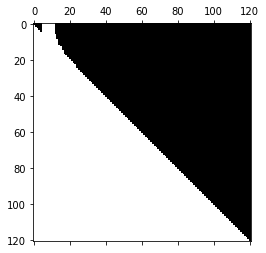

In [7]:
# Example of how to fetch dN/dE(i, j)
print(mceq_run.pman[2212].hadr_yields[mceq_run.pman[211]])
plt.spy(mceq_run.pman[2212].hadr_yields[mceq_run.pman[211]])

In [80]:
# Total cross section
mceq_run.pman[2212].cs

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.65442446e-25, 2.65141632e-25, 2.64919431e-25, 2.64775844e-25,
       2.64710872e-25, 2.64724513e-25, 2.64816768e-25, 2.64987637e-25,
       2.65237120e-25, 2.65565217e-25, 2.65971927e-25, 2.66457252e-25,
       2.67021191e-25, 2.67663744e-25, 2.68384910e-25, 2.69184691e-25,
       2.70063085e-25, 2.71020094e-25, 2.72055716e-25, 2.73169952e-25,
       2.72708601e-25, 2.72306864e-25, 2.71969530e-25, 2.71701385e-25,
       2.71507219e-25, 2.73077560e-25, 2.74734494e-25, 2.76478023e-25,
       2.78308146e-25, 2.80224863e-25, 2.82228174e-25, 2.84318080e-25,
       2.86494579e-25, 2.88757673e-25, 2.91107360e-25, 2.93548688e-25,
       2.96098250e-25, 2.98757347e-25, 3.01525979e-25, 3.04404146e-25,
       3.07391849e-25, 3.10489086e-25, 3.13681126e-25, 3.16757063e-25,
       3.19648083e-25, 3.22354184e-25, 3.24875368e-25, 3.27159352e-25,
      

In [21]:
# Fetching all secondaries
particle_dict = {}
for particle in mceq_run.pman[2212].hadr_secondaries:
    particle_dict[particle.name] = mceq_run.pman[2212].hadr_yields[particle]

In [46]:
particle_dict['pi-']

array([[1.80372804e-02, 2.37588252e-02, 3.27450888e-02, ...,
        5.19704735e+09, 6.78730894e+09, 8.84262297e+09],
       [0.00000000e+00, 2.27071316e-02, 3.12330099e-02, ...,
        3.80017909e+09, 5.32979491e+09, 7.00831904e+09],
       [0.00000000e+00, 0.00000000e+00, 2.65377367e-02, ...,
        2.74986815e+09, 3.83591768e+09, 4.80458548e+09],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        6.45425753e-05, 6.27437516e-04, 2.86629013e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 5.66823830e-05, 7.02814943e-04],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 5.19771055e-05]])

In [42]:
# Example of dumping
pickle.dump(particle_dict, open("../data/proton.pkl", "wb" ))

In [47]:
# Example of loading
proton_data = pickle.load(open("../data/proton.pkl", "rb" ))

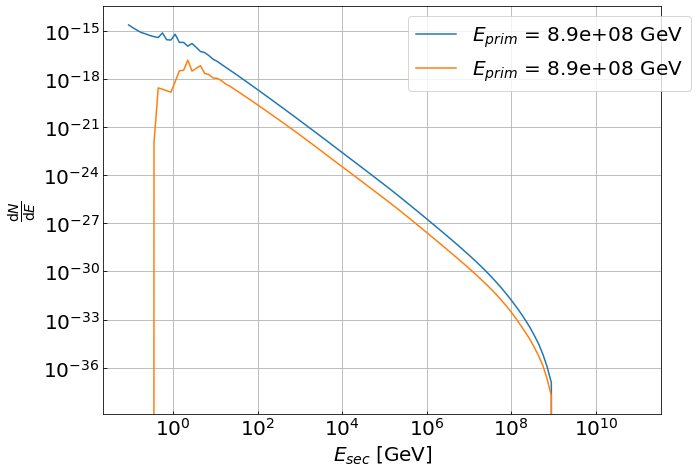

In [81]:
# -----------------------------------------------------------------------------
# Plotting options
std_fig_size = 10.
std_fontsize = 20.
std_lw = 1.5
std_hlength = 2.
# -----------------------------------------------------------------------------
# Plot
fig, axs = plt.subplots(1, 1,
                        figsize=(std_fig_size, std_fig_size * 6. / 8.),
                        sharex=True,
                        gridspec_kw={'hspace': 0})

axs.plot(mceq_run.e_grid, proton_data['pi-'][:, 100] / mceq_run.e_widths * mceq_run.pman[2212].cs[100],
         label=r'$E_{prim}$ = %.1e GeV' %mceq_run.e_grid[100])
axs.plot(mceq_run.e_grid, proton_data['K-'][:, 100] / mceq_run.e_widths * mceq_run.pman[2212].cs[100],
         label=r'$E_{prim}$ = %.1e GeV' %mceq_run.e_grid[100])
lgd = axs.legend(loc=9, bbox_to_anchor=(0.8, +1.),
                ncol=1, fontsize=std_fontsize, handlelength=std_hlength,
                fancybox=True, frameon=True)
axs.set_xlabel(r'$E_{sec}\; \mathrm{[GeV]}$', fontsize=std_fontsize)
axs.set_ylabel(r'$\frac{\mathrm{d}N}{\mathrm{d}E}$',
               fontsize=std_fontsize)
axs.set_xscale('log')
axs.set_yscale('log')
axs.grid(True)
# axs.set_ylim(1e-30, 1e0)
# axs.set_xlim(1e0, 1e7)
axs.tick_params(axis = 'both', which = 'major',
                labelsize=std_fontsize, direction='in')
axs.tick_params(axis = 'both', which = 'minor',
                labelsize=std_fontsize, direction='in')

In [62]:
np.trapz(proton_data['pi-'][:, 100], mceq_run.e_grid) / mceq_run.e_grid[100]

16.99819095070877